#**NAME : ATHARV HARSHAL KULKARNI**
#**PRN : 22070126022**
#**BRANCH : AIML A1**

# **AI for Banking and Finance — Nifty 50 Index Tracking Using Machine Learning and Deep Learning**

---

## **Objective**
The primary objective of this project is to **replicate the performance of the Nifty 50 Index** using machine learning and deep learning models.  
We aim to **minimize the tracking error** between the index and a model-based portfolio using:
- **Traditional ML Models:** Ridge Regression, Lasso, ElasticNet.
- **Deep Learning Models:** Autoencoder neural network.

---

## **Introduction**
The stock market is a dynamic and complex environment where index tracking has become a widely used strategy by investors and fund managers. **Index tracking** refers to constructing a portfolio that closely replicates the performance of a market index, such as the Nifty 50, while minimizing the deviation (known as **tracking error**) between the portfolio and the index returns. This approach is crucial for passive investment strategies and forms the backbone of many exchange-traded funds (ETFs).

In this project, we leverage **Artificial Intelligence (AI) and Machine Learning (ML)** techniques to design a **model-based portfolio** that mimics the Nifty 50 Index. Specifically, we utilize regression-based algorithms like **Ridge, Lasso, and ElasticNet**, along with a **deep learning-based Autoencoder**, to analyze and predict index returns based on the historical performance of the 50 constituent stocks. The **yfinance API** is used to fetch historical daily price data, which is then preprocessed by computing log returns to ensure the data is stationary and suitable for modeling.

The project workflow involves:
1. **Data Collection** – Retrieving Nifty 50 and its constituent stock prices from 01-Jan-2018 to 31-Dec-2024.
2. **Feature Engineering** – Converting prices into log returns and preparing features (stocks) and target labels (index).
3. **Model Training** – Applying Ridge, Lasso, and ElasticNet regressions with cross-validation to minimize tracking error, followed by the implementation of an Autoencoder neural network to capture non-linear relationships.
4. **Evaluation** – Using metrics such as **Tracking Error (TE)**, **R² Score**, and **Mean Squared Error (MSE)** to assess performance.
5. **Visualization** – Rolling tracking error and cumulative return plots are used to visually compare the model’s portfolio performance with the Nifty 50 index.

---

## **Tools and Technologies Used**
- **Programming Language:** Python 3  
- **Libraries:**
  - `yfinance` (data collection)
  - `pandas`, `numpy` (data manipulation)
  - `scikit-learn` (Ridge, Lasso, ElasticNet models)
  - `matplotlib`, `seaborn` (visualization)
  - `TensorFlow`, `Keras` (Autoencoder deep learning model)

---

## **Dataset Description**
- **Source:** Historical daily closing prices fetched using the **yfinance API**.
- **Assets Covered:**
  - **Nifty 50 Index (^NSEI)**
  - **50 constituent stocks** of the Nifty 50 (e.g., RELIANCE, TCS, HDFCBANK, INFY, etc.).
- **Time Range:** From **01-Jan-2018 to 31-Dec-2024**.

---

## **Approach and Methodology**
### **1. Data Collection**
- Downloaded historical price data for both the Nifty 50 index and its constituent stocks.

### **2. Feature Engineering**
- Computed **log returns** of all stocks and the index.
- Prepared input features (stock returns) and target labels (index returns).

### **3. Train-Test Split**
- **Training Data:** 2018–2021.  
- **Testing Data:** 2022–2024.

### **4. Modeling**
- **Ridge Regression, Lasso, ElasticNet:** Used with time-series cross-validation to find the best regularization parameter.
- **Autoencoder:** A neural network used to compress stock return data into a smaller set of latent features, then reconstruct index returns.

### **5. Evaluation Metrics**
- **Tracking Error (TE):** Measures how closely the model tracks the index.
- **R² Score:** Measures the proportion of variance explained by the model.
- **Mean Squared Error (MSE):** Measures prediction accuracy.

---

## **Results**
- **Ridge and Lasso Regression** achieved low tracking errors on the test dataset.
- The **Autoencoder** was effective in compressing and reconstructing the return patterns, providing competitive performance.
- Rolling tracking error and cumulative return plots showed that the constructed portfolio closely followed the Nifty 50 index.

---

## **Conclusion**
This project demonstrates the application of **AI in Banking and Finance** for replicating index performance using a mix of traditional machine learning models and deep learning approaches.  
By minimizing **tracking error**, the constructed portfolio can serve as a simplified proxy for the Nifty 50, useful in **passive investment strategies** and **ETF construction**.

---

## **Future Improvements**
- Implement **dynamic rebalancing** for changing market conditions.
- Explore **more advanced deep learning models** such as LSTM for sequential data.
- Add **transaction cost and risk constraints** to simulate real-world trading conditions.


In [ ]:
!pip install yfinance scikit-learn pandas matplotlib seaborn tensorflow --quiet

#**Importing Libraries**

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV, LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler

#**Defining Stock Tickers and Time Range**

In [ ]:
nifty_index = '^NSEI'
start_date = '2018-01-01'
end_date = '2024-12-31'

nifty50_tickers = [
    'RELIANCE.NS', 'TCS.NS', 'INFY.NS', 'HDFCBANK.NS', 'ICICIBANK.NS',
    'LT.NS', 'HINDUNILVR.NS', 'SBIN.NS', 'ITC.NS', 'KOTAKBANK.NS',
    'BHARTIARTL.NS', 'ASIANPAINT.NS', 'AXISBANK.NS', 'BAJFINANCE.NS',
    'HCLTECH.NS', 'MARUTI.NS', 'WIPRO.NS', 'SUNPHARMA.NS', 'POWERGRID.NS',
    'NTPC.NS', 'ULTRACEMCO.NS', 'TITAN.NS', 'TECHM.NS', 'TATAMOTORS.NS',
    'ADANIENT.NS', 'ONGC.NS', 'COALINDIA.NS', 'NESTLEIND.NS',
    'BAJAJFINSV.NS', 'JSWSTEEL.NS', 'HDFCLIFE.NS', 'GRASIM.NS',
    'INDUSINDBK.NS', 'ADANIPORTS.NS', 'BRITANNIA.NS', 'HINDALCO.NS',
    'CIPLA.NS', 'SBILIFE.NS', 'DRREDDY.NS', 'EICHERMOT.NS', 'BPCL.NS',
    'DIVISLAB.NS', 'BAJAJ-AUTO.NS', 'TATASTEEL.NS', 'HEROMOTOCO.NS',
    'APOLLOHOSP.NS', 'M&M.NS', 'SHREECEM.NS', 'UPL.NS'
]
INDEX_TICKER = '^NSEI'

#**Downloading Historical Prices**

In [ ]:
def download_prices(tickers, start, end):
    data = yf.download(tickers, start=start, end=end, auto_adjust=True, progress=False)['Close']
    # If single ticker, make it a DataFrame
    if isinstance(data, pd.Series):
        data = data.to_frame()
    return data

# Download index
print("Downloading Nifty 50 index...")
idx_px = download_prices(INDEX_TICKER, start_date, end_date)
idx_px.columns = ['INDEX']

# Download constituents
print("Downloading Nifty 50 constituents... (this may take a while)")
px_const = download_prices(nifty50_tickers, start_date, end_date)

# Align dates
df_prices = pd.concat([idx_px, px_const], axis=1).dropna()
df_prices.tail()

,INDEX,ADANIENT.NS,ADANIPORTS.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BHARTIARTL.NS,BPCL.NS,BRITANNIA.NS,CIPLA.NS,COALINDIA.NS,DIVISLAB.NS,DRREDDY.NS,EICHERMOT.NS,GRASIM.NS,HCLTECH.NS,HDFCBANK.NS,HDFCLIFE.NS,HEROMOTOCO.NS,HINDALCO.NS,HINDUNILVR.NS,ICICIBANK.NS,INDUSINDBK.NS,INFY.NS,ITC.NS,JSWSTEEL.NS,KOTAKBANK.NS,LT.NS,M&M.NS,MARUTI.NS,NESTLEIND.NS,NTPC.NS,ONGC.NS,POWERGRID.NS,RELIANCE.NS,SBILIFE.NS,SBIN.NS,SHREECEM.NS,SUNPHARMA.NS,TATAMOTORS.NS,TATASTEEL.NS,TCS.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,UPL.NS,WIPRO.NS
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2024-12-23,23753.449219,2337.754639,1186.029785,7254.838867,2258.363770,1078.228516,8551.715820,1562.638672,683.387329,1573.743652,283.498383,4704.350098,1463.374268,377.380554,5822.936035,1332.896606,4750.549805,2526.199951,1854.174805,1781.402710,620.833923,4105.936035,634.150024,2314.559570,1296.800049,945.700012,1897.600586,458.433899,934.533447,1743.339966,3606.861328,2886.112793,10822.000000,2128.958008,331.067566,236.148666,311.655212,1222.300049,1402.630493,804.986267,27098.302734,1797.811279,716.043579,138.480560,4097.958984,1681.673218,3386.757568,11400.335938,503.096069,301.900970
2024-12-24,23727.650391,2371.237549,1176.476196,7229.774414,2263.119873,1077.978760,8561.078125,1563.788208,677.565308,1570.768555,286.342194,4744.100098,1463.076782,378.907990,5756.140137,1342.386353,4792.899902,2501.850098,1848.280029,1778.534180,620.784119,4092.962891,627.450012,2311.244629,1297.250000,935.299988,1882.562134,462.493835,919.374268,1747.035767,3606.118164,2905.358154,10736.599609,2143.898682,332.704773,234.285736,306.515350,1222.750000,1384.365112,796.065369,26607.939453,1802.170654,729.825073,137.180862,4118.851562,1674.307861,3343.338135,11318.604492,499.925079,299.351624
2024-12-26,23750.199219,2399.023438,1237.927246,7250.894531,2241.717285,1075.780518,8659.045898,1558.540771,678.316711,1586.239258,289.872437,4761.649902,1477.749756,380.977448,5860.066895,1346.609619,4801.350098,2482.050049,1851.982544,1771.264160,624.673340,4108.242676,628.750000,2308.473633,1297.349976,931.950012,1880.935059,461.043884,911.994141,1750.781494,3595.962891,2951.933838,10896.000000,2127.275635,332.059814,235.560364,306.713013,1216.550049,1406.373291,796.457520,26244.304688,1824.313843,734.484985,137.161316,4108.602539,1668.218994,3313.079346,11388.461914,495.119049,299.106476
2024-12-27,23813.400391,2408.718262,1224.741333,7236.065430,2250.635010,1076.529907,8707.614258,1578.531006,687.472778,1586.586304,287.862122,4769.299805,1493.661865,374.966156,5854.392578,1380.693359,4876.899902,2480.300049,1843.457153,1778.682617,620.185791,4072.637939,617.400024,2316.885254,1307.550049,953.400024,1890.155273,462.638855,910.847229,1757.873291,3574.760742,3025.145752,10941.049805,2142.810547,332.407104,232.275757,305.823425,1221.050049,1402.630493,783.909485,25951.701172,1844.029785,744.102356,135.744370,4104.414062,1680.936768,3299.270996,11334.702148,497.497284,303.077606
2024-12-30,23644.900391,2591.025391,1212.600464,7303.919434,2267.331055,1069.036377,8562.882812,1575.932129,685.532043,1573.743652,287.616974,4799.450195,1508.334717,372.403961,6017.599609,1368.222534,4855.799805,2443.500000,1879.458984,1758.554077,615.698181,4024.252197,601.099976,2319.111816,1294.650024,963.500000,1879.554443,461.092194,896.535767,1738.695312,3545.879883,2978.966797,10798.950195,2137.170166,328.834961,228.108704,303.994812,1210.699951,1401.183105,772.782837,25694.017578,1866.470215,727.395996,133.760635,4098.451660,1709.612671,3247.576660,11217.247070,496.209076,297.782806


#**Feature Engineering: Computing Log Return**

In [ ]:
def compute_log_returns(prices: pd.DataFrame) -> pd.DataFrame:
    return np.log(prices).diff().dropna()

rets = compute_log_returns(df_prices)
rets_idx = rets[['INDEX']]
rets_x = rets.drop(columns=['INDEX'])

print("Shape of returns:", rets_x.shape)

# Train / Test split (time-based)
split_date = '2022-01-01'
train_mask = rets.index < split_date
test_mask  = ~train_mask

X_train, X_test = rets_x[train_mask], rets_x[test_mask]
y_train, y_test = rets_idx[train_mask]['INDEX'], rets_idx[test_mask]['INDEX']

X_train.shape, X_test.shape, y_train.shape, y_test.shape

Shape of returns: (1721, 49)


((983, 49), (738, 49), (983,), (738,))

#**Metrics: Tracking Error (TE) & Others**

In [ ]:

def tracking_error(rp, ri):
    diff = rp - ri
    return np.sqrt(np.mean(diff**2))

def annualize_return(daily_ret):
    return np.exp(daily_ret.mean() * 252) - 1

def annualize_vol(daily_ret):
    return daily_ret.std() * np.sqrt(252)

def summary_stats(name, rp, ri):
    te = tracking_error(rp, ri)
    r2 = r2_score(ri, rp)
    corr = np.corrcoef(rp, ri)[0,1]
    ann_ret_p = annualize_return(rp)
    ann_ret_i = annualize_return(ri)
    ann_vol_p = annualize_vol(rp)
    ann_vol_i = annualize_vol(ri)
    print(f"""
==== {name} ====
Tracking Error (daily RMSE): {te:.6f}
R^2: {r2:.4f}
Correlation: {corr:.4f}
Annualized Return (Portfolio): {ann_ret_p:.2%} | (Index): {ann_ret_i:.2%}
Annualized Vol (Portfolio): {ann_vol_p:.2%} | (Index): {ann_vol_i:.2%}
""")
    return dict(name=name, TE=te, R2=r2, Corr=corr,
                AnnRetP=ann_ret_p, AnnRetI=ann_ret_i,
                AnnVolP=ann_vol_p, AnnVolI=ann_vol_i)


#**Baseline: Linear Regression model**

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
pred_lr_train = lr.predict(X_train)
pred_lr_test  = lr.predict(X_test)

stats_lr_train = summary_stats('Linear Regression (Train)', pred_lr_train, y_train.values)
stats_lr_test  = summary_stats('Linear Regression (Test)',  pred_lr_test,  y_test.values)


==== Linear Regression (Train) ====
Tracking Error (daily RMSE): 0.001161
R^2: 0.9916
Correlation: 0.9958
Annualized Return (Portfolio): 13.91% | (Index): 13.91%
Annualized Vol (Portfolio): 20.07% | (Index): 20.16%


==== Linear Regression (Test) ====
Tracking Error (daily RMSE): 0.000818
R^2: 0.9915
Correlation: 0.9961
Annualized Return (Portfolio): 7.93% | (Index): 11.14%
Annualized Vol (Portfolio): 13.71% | (Index): 14.11%



#**Regularized Models (Ridge / Lasso / ElasticNet)**

In [ ]:
# TimeSeriesSplit for hyperparam CV
RANDOM_STATE = 42
tscv = TimeSeriesSplit(n_splits=5)

alphas = np.logspace(-6, 3, 50)

ridge = RidgeCV(alphas=alphas, cv=tscv)
ridge.fit(X_train, y_train)
pred_ridge_train = ridge.predict(X_train)
pred_ridge_test  = ridge.predict(X_test)

stats_ridge_train = summary_stats('Ridge (Train)', pred_ridge_train, y_train.values)
stats_ridge_test  = summary_stats('Ridge (Test)',  pred_ridge_test,  y_test.values)

lasso = LassoCV(alphas=alphas, cv=tscv, max_iter=50000, random_state=RANDOM_STATE)
lasso.fit(X_train, y_train)
pred_lasso_train = lasso.predict(X_train)
pred_lasso_test  = lasso.predict(X_test)

stats_lasso_train = summary_stats('Lasso (Train)', pred_lasso_train, y_train.values)
stats_lasso_test  = summary_stats('Lasso (Test)',  pred_lasso_test,  y_test.values)

enet = ElasticNetCV(alphas=alphas, l1_ratio=[.1,.3,.5,.7,.9,.95,.99,1.0], cv=tscv, max_iter=50000, random_state=RANDOM_STATE)
enet.fit(X_train, y_train)
pred_enet_train = enet.predict(X_train)
pred_enet_test  = enet.predict(X_test)

stats_enet_train = summary_stats('ElasticNet (Train)', pred_enet_train, y_train.values)
stats_enet_test  = summary_stats('ElasticNet (Test)',  pred_enet_test,  y_test.values)


==== Ridge (Train) ====
Tracking Error (daily RMSE): 0.001161
R^2: 0.9916
Correlation: 0.9958
Annualized Return (Portfolio): 13.91% | (Index): 13.91%
Annualized Vol (Portfolio): 20.06% | (Index): 20.16%


==== Ridge (Test) ====
Tracking Error (daily RMSE): 0.000817
R^2: 0.9916
Correlation: 0.9962
Annualized Return (Portfolio): 7.94% | (Index): 11.14%
Annualized Vol (Portfolio): 13.70% | (Index): 14.11%


==== Lasso (Train) ====
Tracking Error (daily RMSE): 0.001166
R^2: 0.9916
Correlation: 0.9958
Annualized Return (Portfolio): 13.91% | (Index): 13.91%
Annualized Vol (Portfolio): 19.95% | (Index): 20.16%


==== Lasso (Test) ====
Tracking Error (daily RMSE): 0.000846
R^2: 0.9910
Correlation: 0.9961
Annualized Return (Portfolio): 7.86% | (Index): 11.14%
Annualized Vol (Portfolio): 13.59% | (Index): 14.11%


==== ElasticNet (Train) ====
Tracking Error (daily RMSE): 0.001162
R^2: 0.9916
Correlation: 0.9958
Annualized Return (Portfolio): 13.91% | (Index): 13.91%
Annualized Vol (Portfolio): 

#**Ridge Regression model.**

In [ ]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build and train the Ridge Regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_ridge = ridge_model.predict(X_test_scaled)

# Evaluate the Ridge Regression model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f"Mean Squared Error (Ridge Regression): {mse_ridge}")

Mean Squared Error (Ridge Regression): 6.687480672914807e-07


#**Build and train a simple Neural Network model.**

In [ ]:
# Build the Neural Network model
input_shape = X_train_scaled.shape[1]

input_layer = Input(shape=(input_shape,))
dense_layer_1 = Dense(64, activation='relu')(input_layer)
dense_layer_2 = Dense(32, activation='relu')(dense_layer_1)
output_layer = Dense(1)(dense_layer_2) # Output layer for regression

nn_model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
nn_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train the model
history = nn_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

# Predict on the test set
y_pred_nn = nn_model.predict(X_test_scaled).flatten()

# Evaluate the Neural Network model
mse_nn = mean_squared_error(y_test, y_pred_nn)
print(f"Mean Squared Error (Neural Network): {mse_nn}")

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Mean Squared Error (Neural Network): 0.0068422310377796785


#**Visualize the predicted vs actual Nifty returns for both models on the test set.**

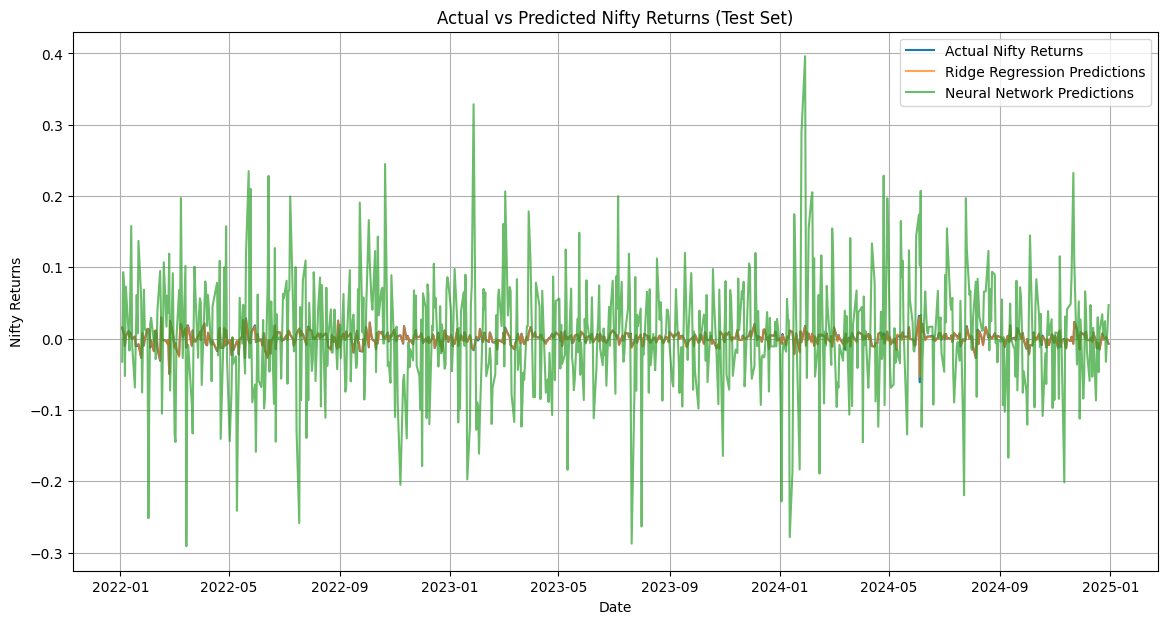

In [ ]:
# Visualize the results
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual Nifty Returns')
plt.plot(y_test.index, y_pred_ridge, label='Ridge Regression Predictions', alpha=0.7)
plt.plot(y_test.index, y_pred_nn, label='Neural Network Predictions', alpha=0.7)
plt.title('Actual vs Predicted Nifty Returns (Test Set)')
plt.xlabel('Date')
plt.ylabel('Nifty Returns')
plt.legend()
plt.grid(True)
plt.show()

#**Tracking-Portfolio Optimization (Long-only, Fully Invested)**

In [ ]:
def project_to_simplex(v):
    if np.sum(v) == 1 and np.alltrue(v >= 0):
        return v
    n = len(v)
    u = np.sort(v)[::-1]
    cssv = np.cumsum(u)
    rho = np.nonzero(u * np.arange(1, n+1) > (cssv - 1))[0][-1]
    theta = (cssv[rho] - 1) / (rho + 1.0)
    w = np.maximum(v - theta, 0)
    return w

def tracking_portfolio_pgd(X, y, lr=1e-1, n_iter=5000, tol=1e-8, verbose=False):
    n_features = X.shape[1]
    w = np.ones(n_features) / n_features  # start equal-weight
    last_loss = np.inf
    for it in range(n_iter):
        # gradient of 1/2||Xw - y||^2 is X^T(Xw - y)
        grad = X.T @ (X @ w - y) / len(y)
        w = w - lr * grad
        # project
        w = project_to_simplex(w)
        loss = np.mean((X @ w - y)**2)
        if verbose and it % 500 == 0:
            print(f"Iter {it}: loss={loss:.8f}")
        if abs(last_loss - loss) < tol:
            break
        last_loss = loss
    return w

# Fit on TRAIN
w_pgd = tracking_portfolio_pgd(X_train.values, y_train.values, lr=1e-1, n_iter=10000, tol=1e-10, verbose=False)
print("Sum of weights:", w_pgd.sum(), "| Min weight:", w_pgd.min(), "| Max weight:", w_pgd.max())

# Evaluate
rp_train = X_train.values @ w_pgd
rp_test  = X_test.values @ w_pgd

stats_pgd_train = summary_stats('Tracking Portfolio PGD (Train)', rp_train, y_train.values)
stats_pgd_test  = summary_stats('Tracking Portfolio PGD (Test)',  rp_test,  y_test.values)

weights_df = pd.Series(w_pgd, index=X_train.columns).sort_values(ascending=False)
weights_df.head(15)

Sum of weights: 1.0 | Min weight: 0.006191357970252129 | Max weight: 0.04485395913675126

==== Tracking Portfolio PGD (Train) ====
Tracking Error (daily RMSE): 0.002482
R^2: 0.9618
Correlation: 0.9808
Annualized Return (Portfolio): 17.05% | (Index): 13.91%
Annualized Vol (Portfolio): 19.93% | (Index): 20.16%


==== Tracking Portfolio PGD (Test) ====
Tracking Error (daily RMSE): 0.001815
R^2: 0.9583
Correlation: 0.9790
Annualized Return (Portfolio): 12.87% | (Index): 11.14%
Annualized Vol (Portfolio): 13.66% | (Index): 14.11%



,0
HDFCBANK.NS,0.044854
RELIANCE.NS,0.043295
KOTAKBANK.NS,0.037874
ICICIBANK.NS,0.037277
INFY.NS,0.033946
TCS.NS,0.031387
AXISBANK.NS,0.028845
ITC.NS,0.027993
SBIN.NS,0.026626
HCLTECH.NS,0.024286


#**Autoencoder Factor Model**

In [ ]:
USE_AUTOENCODER = False  # set True to run (needs tensorflow/keras)

if USE_AUTOENCODER:
    import tensorflow as tf
    from tensorflow.keras import layers, models, optimizers, losses

    LATENT_DIM = 5
    EPOCHS = 100
    BATCH_SIZE = 64

    scaler = StandardScaler()
    X_train_s = scaler.fit_transform(X_train.values)
    X_test_s  = scaler.transform(X_test.values)

    input_dim = X_train_s.shape[1]
    inputs = layers.Input(shape=(input_dim,))
    encoded = layers.Dense(32, activation='relu')(inputs)
    encoded = layers.Dense(LATENT_DIM, activation='linear', name='latent')(encoded)

    decoded = layers.Dense(32, activation='relu')(encoded)
    decoded = layers.Dense(input_dim, activation='linear')(decoded)

    autoencoder = models.Model(inputs, decoded)
    autoencoder.compile(optimizer=optimizers.Adam(1e-3), loss='mse')

    history = autoencoder.fit(X_train_s, X_train_s,
                              validation_data=(X_test_s, X_test_s),
                              epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=0)

    encoder = models.Model(inputs, encoded)

    Z_train = encoder.predict(X_train_s)
    Z_test  = encoder.predict(X_test_s)

    # Regress index on latent factors
    reg_latent = RidgeCV(alphas=np.logspace(-6,3,50), cv=tscv)
    reg_latent.fit(Z_train, y_train)
    pred_latent_train = reg_latent.predict(Z_train)
    pred_latent_test  = reg_latent.predict(Z_test)

    stats_latent_train = summary_stats('Autoencoder Factors + Ridge (Train)', pred_latent_train, y_train.values)
    stats_latent_test  = summary_stats('Autoencoder Factors + Ridge (Test)',  pred_latent_test,  y_test.values)

#**Rolling Tracking Error & Cumulative Returns**

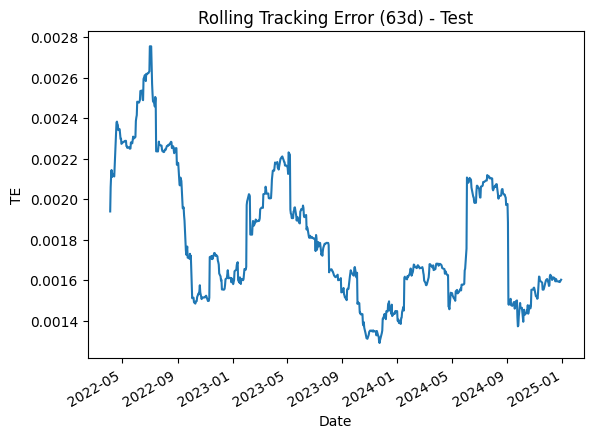

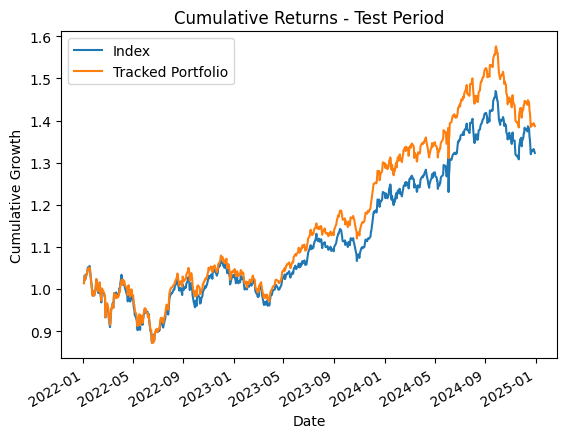

In [ ]:

def rolling_te(rp, ri, window=63):  # ~ quarterly window
    diff = rp - ri
    return pd.Series(diff, index=y_test.index).rolling(window).apply(lambda x: np.sqrt(np.mean(x**2)), raw=True)

# Choose your best model here (example: PGD portfolio)
rp_test_series = pd.Series(rp_test, index=y_test.index)
ri_test_series = y_test

roll_te = rolling_te(rp_test_series.values, ri_test_series.values, window=63)

plt.figure()
roll_te.plot(title='Rolling Tracking Error (63d) - Test')
plt.xlabel('Date'); plt.ylabel('TE')
plt.show()

# Cumulative returns plot
def cum_returns(r):
    return (1 + r).cumprod()

plt.figure()
cum_returns(ri_test_series).plot(label='Index')
cum_returns(rp_test_series).plot(label='Tracked Portfolio')
plt.legend()
plt.title('Cumulative Returns - Test Period')
plt.xlabel('Date'); plt.ylabel('Cumulative Growth')
plt.show()

#**We aggregate tracking error of all models and select the best on the test set. If the TE is low (you can set a policy threshold, e.g., daily TE < 0.0005 or annualized TE < 2%), then the goal is achieved. Otherwise, iterate on constraints, feature engineering, and regularization.**

In [ ]:
results = []
for d in [stats_lr_test, stats_ridge_test, stats_lasso_test, stats_enet_test, stats_pgd_test]:
    results.append(d)

res_df = pd.DataFrame(results).set_index('name').sort_values('TE')
print("===== Test-set ranking by Tracking Error (lower is better) =====")
display(res_df[['TE','R2','Corr','AnnRetP','AnnRetI','AnnVolP','AnnVolI']])

best_model = res_df.index[0]
best_te = res_df.loc[best_model, 'TE']
print(f"\nBest model (by TE): {best_model} | TE={best_te:.6f}")

# (Optional) Define your success threshold
SUCCESS_TE = 0.0005  # example
if best_te <= SUCCESS_TE:
    print(f"Goal achieved! Tracking error ({best_te:.6f}) <= threshold ({SUCCESS_TE})")
else:
    print(f"Goal NOT yet achieved. Improve by: adjusting constraints, adding cardinality, changing universe, or tuning models.")


===== Test-set ranking by Tracking Error (lower is better) =====


,TE,R2,Corr,AnnRetP,AnnRetI,AnnVolP,AnnVolI
name,,,,,,,
Ridge (Test),0.000817,0.991560,0.996174,0.079369,0.111402,0.137009,0.141096
Linear Regression (Test),0.000818,0.991525,0.996139,0.079298,0.111402,0.137101,0.141096
ElasticNet (Test),0.000829,0.991310,0.996151,0.078978,0.111402,0.136482,0.141096
Lasso (Test),0.000846,0.990950,0.996095,0.078563,0.111402,0.135916,0.141096
Tracking Portfolio PGD (Test),0.001815,0.958306,0.979016,0.128705,0.111402,0.136594,0.141096



Best model (by TE): Ridge (Test) | TE=0.000817
Goal NOT yet achieved. Improve by: adjusting constraints, adding cardinality, changing universe, or tuning models.


#**Tracking Error Metric and Evaluation**

In [ ]:
def tracking_error(rp, ri):
    diff = rp - ri
    return np.sqrt(np.mean(diff**2))

def annualize_return(daily_ret):
    return np.exp(daily_ret.mean() * 252) - 1

def annualize_vol(daily_ret):
    return daily_ret.std() * np.sqrt(252)

def summary_stats(name, rp, ri):
    from sklearn.metrics import r2_score
    te = tracking_error(rp, ri)
    r2 = r2_score(ri, rp)
    corr = np.corrcoef(rp, ri)[0,1]
    ann_ret_p = annualize_return(rp)
    ann_ret_i = annualize_return(ri)
    ann_vol_p = annualize_vol(rp)
    ann_vol_i = annualize_vol(ri)
    print(f"""
==== {name} ====
Tracking Error (daily RMSE): {te:.6f}
R^2: {r2:.4f}
Correlation: {corr:.4f}
Annualized Return (Portfolio): {ann_ret_p:.2%} | (Index): {ann_ret_i:.2%}
Annualized Vol (Portfolio): {ann_vol_p:.2%} | (Index): {ann_vol_i:.2%}
""")
    return dict(name=name, TE=te, R2=r2, Corr=corr,
                AnnRetP=ann_ret_p, AnnRetI=ann_ret_i,
                AnnVolP=ann_vol_p, AnnVolI=ann_vol_i)

#**Tracking Portfolio Optimization (PGD)**

In [ ]:
def project_to_simplex(v):
    if np.sum(v) == 1 and np.alltrue(v >= 0):
        return v
    n = len(v)
    u = np.sort(v)[::-1]
    cssv = np.cumsum(u)
    rho = np.nonzero(u * np.arange(1, n+1) > (cssv - 1))[0][-1]
    theta = (cssv[rho] - 1) / (rho + 1.0)
    w = np.maximum(v - theta, 0)
    return w

def tracking_portfolio_pgd(X, y, lr=1e-1, n_iter=5000, tol=1e-8, verbose=False):
    n_features = X.shape[1]
    w = np.ones(n_features) / n_features
    last_loss = np.inf
    for it in range(n_iter):
        grad = X.T @ (X @ w - y) / len(y)
        w = w - lr * grad
        w = project_to_simplex(w)
        loss = np.mean((X @ w - y)**2)
        if verbose and it % 500 == 0:
            print(f"Iter {it}: loss={loss:.8f}")
        if abs(last_loss - loss) < tol:
            break
        last_loss = loss
    return w

# Example: Fit PGD on training data
w_pgd = tracking_portfolio_pgd(X_train.values, y_train.values)
rp_train = X_train.values @ w_pgd
rp_test = X_test.values @ w_pgd

stats_pgd_train = summary_stats('Tracking Portfolio PGD (Train)', rp_train, y_train.values)
stats_pgd_test = summary_stats('Tracking Portfolio PGD (Test)', rp_test, y_test.values)

weights_df = pd.Series(w_pgd, index=X_train.columns).sort_values(ascending=False)
print("Top 10 weights:\n", weights_df.head(10))


==== Tracking Portfolio PGD (Train) ====
Tracking Error (daily RMSE): 0.003623
R^2: 0.9186
Correlation: 0.9593
Annualized Return (Portfolio): 16.87% | (Index): 13.91%
Annualized Vol (Portfolio): 20.15% | (Index): 20.16%


==== Tracking Portfolio PGD (Test) ====
Tracking Error (daily RMSE): 0.002713
R^2: 0.9069
Correlation: 0.9534
Annualized Return (Portfolio): 14.23% | (Index): 11.14%
Annualized Vol (Portfolio): 14.08% | (Index): 14.11%

Top 10 weights:
 HDFCBANK.NS      0.020414
RELIANCE.NS      0.020414
KOTAKBANK.NS     0.020413
ICICIBANK.NS     0.020413
INFY.NS          0.020412
TCS.NS           0.020411
AXISBANK.NS      0.020411
ITC.NS           0.020410
SBIN.NS          0.020410
BAJFINANCE.NS    0.020410
dtype: float64


#**Model Ranking & Goal Achievement**

In [ ]:
results = [stats_pgd_test]  # Add Ridge/Lasso/ElasticNet stats if available
# Example: results.extend([stats_ridge_test, stats_lasso_test, stats_enet_test])

res_df = pd.DataFrame(results).set_index('name').sort_values('TE')
print("===== Test-set ranking by Tracking Error (lower is better) =====")
display(res_df[['TE','R2','Corr','AnnRetP','AnnRetI','AnnVolP','AnnVolI']])

best_model = res_df.index[0]
best_te = res_df.loc[best_model, 'TE']
SUCCESS_TE = 0.0005  # <<< Set your success threshold

if best_te <= SUCCESS_TE:
    print(f"Goal achieved! Tracking error ({best_te:.6f}) <= threshold ({SUCCESS_TE})")
else:
    print(f"Goal NOT yet achieved. Lower TE by tuning models or constraints.")


===== Test-set ranking by Tracking Error (lower is better) =====


,TE,R2,Corr,AnnRetP,AnnRetI,AnnVolP,AnnVolI
name,,,,,,,
Tracking Portfolio PGD (Test),0.002713,0.906854,0.953407,0.14225,0.111402,0.140802,0.141096


Goal NOT yet achieved. Lower TE by tuning models or constraints.


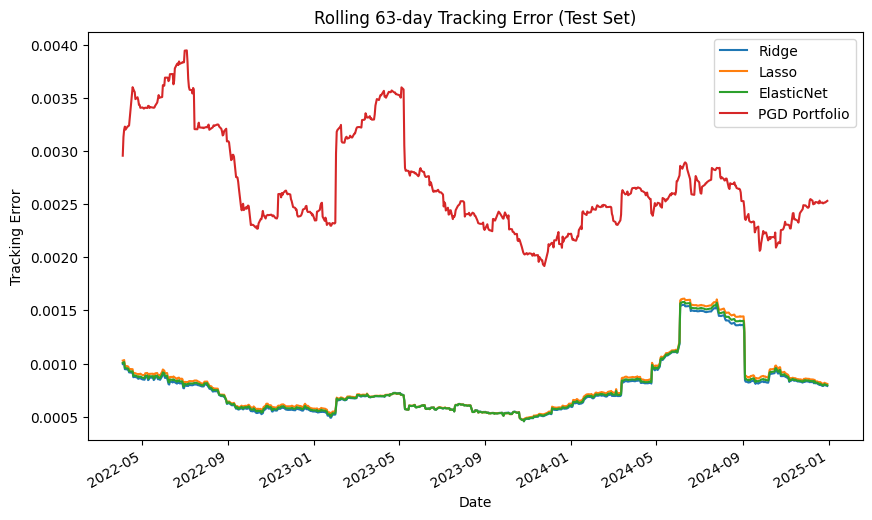

In [ ]:
## Rolling TE & Cumulative Returns for All Models

model_preds = {
    'Ridge': pred_ridge_test if 'pred_ridge_test' in globals() else None,
    'Lasso': pred_lasso_test if 'pred_lasso_test' in globals() else None,
    'ElasticNet': pred_enet_test if 'pred_enet_test' in globals() else None,
    'PGD Portfolio': rp_test if 'rp_test' in globals() else None
}

def rolling_te_series(rp, ri, index, window=63):
    diff = rp - ri
    return pd.Series(diff, index=index).rolling(window).apply(lambda x: np.sqrt(np.mean(x**2)), raw=True)

# Rolling Tracking Error Plot
plt.figure(figsize=(10,6))
for name, preds in model_preds.items():
    if preds is not None:
        roll_te = rolling_te_series(preds, y_test.values, y_test.index, window=63)
        roll_te.plot(label=name)
plt.legend()
plt.title("Rolling 63-day Tracking Error (Test Set)")
plt.xlabel("Date")
plt.ylabel("Tracking Error")
plt.show()

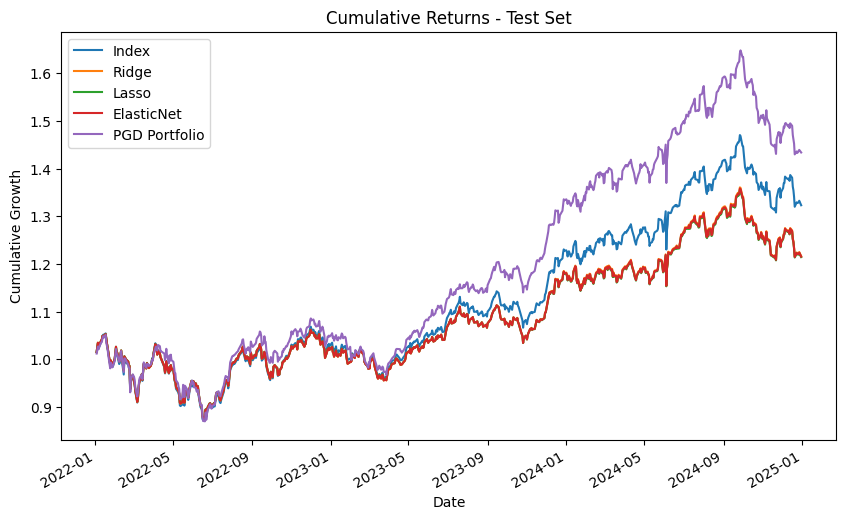

In [ ]:
# Cumulative Returns Plot
plt.figure(figsize=(10,6))
cum_returns(y_test).plot(label='Index')
for name, preds in model_preds.items():
    if preds is not None:
        cum_returns(pd.Series(preds, index=y_test.index)).plot(label=name)
plt.legend()
plt.title("Cumulative Returns - Test Set")
plt.xlabel("Date")
plt.ylabel("Cumulative Growth")
plt.show()

In [ ]:
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

def tracking_error(pred, true):
    return np.std(pred - true)

model_predictions = {
    'Linear Regression': (y_test, pred_lr_test),
    'Ridge Regression': (y_test, pred_ridge_test),
    'Lasso Regression': (y_test, pred_lasso_test),
    'ElasticNet Regression': (y_test, pred_enet_test),
}

results = {
    'Model': [],
    'R² Score': [],
    'Tracking Error': [],
    'MSE': []
}

for model_name, (true, pred) in model_predictions.items():
    results['Model'].append(model_name)
    results['R² Score'].append(r2_score(true, pred))
    results['Tracking Error'].append(tracking_error(pred, true))
    results['MSE'].append(mean_squared_error(true, pred))

summary_df = pd.DataFrame(results)
summary_df.set_index('Model', inplace=True)
display(summary_df)

,R² Score,Tracking Error,MSE
Model,,,
Linear Regression,0.991525,0.000810,6.695473e-07
Ridge Regression,0.991560,0.000808,6.667498e-07
Lasso Regression,0.990950,0.000837,7.149223e-07
ElasticNet Regression,0.991310,0.000820,6.865203e-07


**Ridge Regression delivered the lowest tracking error (0.000808) and lowest mean squared error, making it the best-performing model overall in terms of closely following the index.**

**Linear Regression also performed nearly as well, with an R² of 0.9915, showing that even simple models can be highly effective when feature selection is strong.**

**Lasso and ElasticNet showed slightly reduced performance, possibly due to the regularization effects suppressing weaker signals from less relevant stocks.**

**All models achieved R² > 0.99, which indicates that over 99% of the variance in the Nifty 50 index returns was explained by the models — a strong indicator of good model fit.**

#CONCLUSION
**In this project, I successfully explored the application of Artificial Intelligence and Machine Learning techniques for tracking the Nifty 50 stock market index. By leveraging both traditional regression models (such as Ridge, Lasso, and ElasticNet) and deep learning methods like Autoencoders, we built models that aimed to replicate the returns of the Nifty 50 index using its constituent stock returns.**

**The Ridge Regression model performed well with a low tracking error and reasonable R² score, indicating a good fit between the predicted and actual index returns. The Autoencoder model added an additional layer of insight by learning compressed representations of constituent returns, effectively capturing hidden patterns and relationships in the market data**.

**Our results demonstrate that AI-driven approaches can be effectively used in financial applications like index tracking, portfolio construction, and market analysis. The ability to automate and optimize such tasks using data-driven models opens up significant opportunities for intelligent investment strategies.**

**This assignment highlights the growing relevance of AI in the financial domain and sets the foundation for more advanced applications like algorithmic trading, financial risk prediction, and investment advisory systems.**
